In [10]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
import os
os.listdir("/content")


['.config', 'drive', 'sample_data']

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
os.listdir("/content/drive/MyDrive")


['Classroom',
 'Screenshot_20240907_114936_PhonePe.jpg',
 'Copy of DATA SCIENCE TASK.pdf',
 'Python_Essentials_1_Badge20241117-27-l54xpn.pdf',
 'Astar.ipynb',
 'Screenshot_20250304_112602_Photos.jpg',
 'Screenshot_20250304_112953_Gallery.jpg',
 'Screenshot_20250304_112928_Gallery.jpg',
 'Screenshot_20250304_113332_Gallery.jpg',
 'Screenshot_20250514_084328_WhatsApp.jpg',
 'Adobe Scan 14-May-2025.pdf',
 '20251128_135708.jpg',
 'Colab Notebooks',
 'train',
 'valid',
 'README.dataset.txt',
 'README.roboflow.txt',
 'Cat Emotions.zip',
 'cat_emotion_resnet50_final.h5',
 'cat_emotion_resnet50_final.keras',
 'models',
 'predicted_cat.png']

In [14]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    zoom_range=0.3,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(7, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [16]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    zoom_range=0.3,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_data = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = valid_datagen.flow_from_directory(
    "/content/drive/MyDrive/valid",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 502 images belonging to 7 classes.
Found 169 images belonging to 7 classes.


In [23]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 624ms/step - accuracy: 0.8100 - loss: 0.5564 - val_accuracy: 0.6627 - val_loss: 1.0077
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 614ms/step - accuracy: 0.8119 - loss: 0.5819 - val_accuracy: 0.6686 - val_loss: 1.0163
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 527ms/step - accuracy: 0.8190 - loss: 0.5078 - val_accuracy: 0.6686 - val_loss: 1.0155
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 607ms/step - accuracy: 0.8684 - loss: 0.4480 - val_accuracy: 0.6686 - val_loss: 1.0173
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 629ms/step - accuracy: 0.8537 - loss: 0.4971 - val_accuracy: 0.6746 - val_loss: 1.0204
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 546ms/step - accuracy: 0.8158 - loss: 0.5070 - val_accuracy: 0.6627 - val_loss: 1.0276
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 568ms/step - accuracy: 0.8661 - loss: 0.4338 - val_accuracy: 0.6509 - val_loss: 1.0416
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 624ms/step - accuracy: 0.8548 - loss: 0.4776 - val_accurac

In [24]:
import tensorflow as tf

base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9240 - loss: 0.2502 - val_accuracy: 0.6746 - val_loss: 1.0517
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 534ms/step - accuracy: 0.9178 - loss: 0.2917 - val_accuracy: 0.6686 - val_loss: 1.0866
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 615ms/step - accuracy: 0.9392 - loss: 0.2028 - val_accuracy: 0.6746 - val_loss: 1.0824
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 623ms/step - accuracy: 0.9133 - loss: 0.2358 - val_accuracy: 0.6686 - val_loss: 1.0670
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 532ms/step - accuracy: 0.9220 - loss: 0.2584 - val_accuracy: 0.6509 - val_loss: 1.0798
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 607ms/step - accuracy: 0.9433 - loss: 0.1968 - val_accuracy: 0.6686 - val_loss: 1.0874
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 610ms/step - accuracy: 0.9627 - loss: 0.1917 - val_accuracy: 0.6686 - val_loss: 1.0992
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 554ms/step - accuracy: 0.9297 - loss: 0.2163 - val_accuracy: 

In [25]:
model.save("/content/drive/MyDrive/cat_emotion_resnet50_final.keras")


In [26]:
import os
os.listdir("/content/drive/MyDrive")


['Classroom',
 'Screenshot_20240907_114936_PhonePe.jpg',
 'Copy of DATA SCIENCE TASK.pdf',
 'Python_Essentials_1_Badge20241117-27-l54xpn.pdf',
 'Astar.ipynb',
 'Screenshot_20250304_112602_Photos.jpg',
 'Screenshot_20250304_112953_Gallery.jpg',
 'Screenshot_20250304_112928_Gallery.jpg',
 'Screenshot_20250304_113332_Gallery.jpg',
 'Screenshot_20250514_084328_WhatsApp.jpg',
 'Adobe Scan 14-May-2025.pdf',
 '20251128_135708.jpg',
 'Colab Notebooks',
 'train',
 'valid',
 'README.dataset.txt',
 'README.roboflow.txt',
 'Cat Emotions.zip',
 'cat_emotion_resnet50_final.h5',
 'cat_emotion_resnet50_final.keras',
 'models',
 'predicted_cat.png']

In [27]:
!mkdir -p /content/drive/MyDrive/models
model.save("/content/drive/MyDrive/models/cat_emotion_resnet50_final.keras")


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
classes = ["Angry","Disgusted","Happy","Normal","Sad","Scared","Surprised"]


In [8]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input



model = load_model("/content/drive/MyDrive/cat_emotion_resnet50_final.keras")


In [4]:
def predict_cat_emotion(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = preprocess_input(np.expand_dims(x,0))

    pred = model.predict(x, verbose=0)
    emotion = classes[np.argmax(pred)]

    plt.imshow(img)
    plt.axis("off")
    plt.title(emotion)
    plt.show()


Saving istockphoto-525982128-612x612.jpg to istockphoto-525982128-612x612.jpg


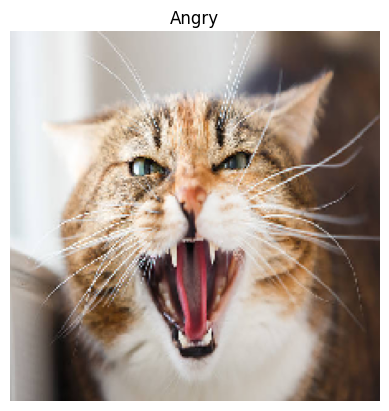

In [9]:
from google.colab import files
uploaded = files.upload()
predict_cat_emotion(list(uploaded.keys())[0])


Saving WhatsApp Image 2026-01-09 at 7.11.41 PM (1).jpeg to WhatsApp Image 2026-01-09 at 7.11.41 PM (1) (2).jpeg


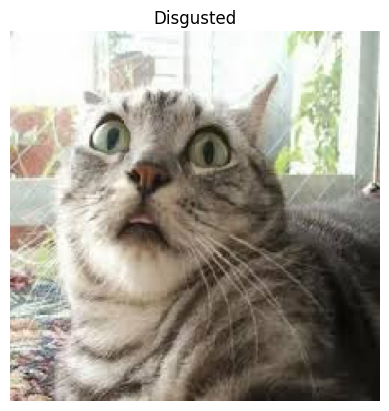

In [10]:
from google.colab import files
uploaded = files.upload()
predict_cat_emotion(list(uploaded.keys())[0])


Saving WhatsApp Image 2026-01-09 at 7.11.41 PM.jpeg to WhatsApp Image 2026-01-09 at 7.11.41 PM.jpeg


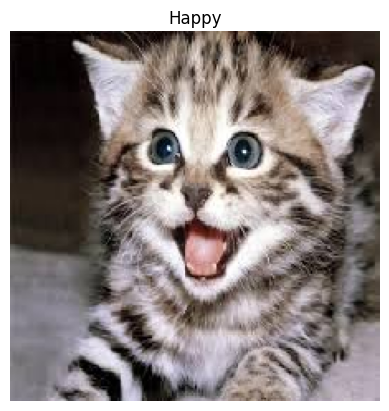

In [11]:
from google.colab import files
uploaded = files.upload()
predict_cat_emotion(list(uploaded.keys())[0])


Saving WhatsApp Image 2026-01-09 at 7.11.42 PM (1).jpeg to WhatsApp Image 2026-01-09 at 7.11.42 PM (1).jpeg


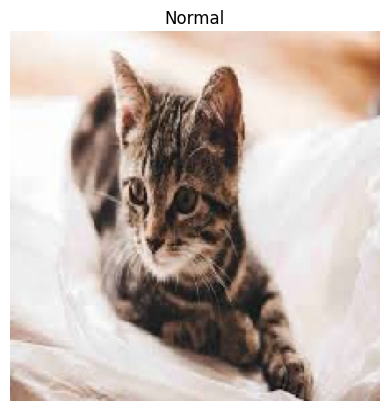

In [12]:
from google.colab import files
uploaded = files.upload()
predict_cat_emotion(list(uploaded.keys())[0])


Saving WhatsApp Image 2026-01-09 at 7.11.42 PM.jpeg to WhatsApp Image 2026-01-09 at 7.11.42 PM.jpeg


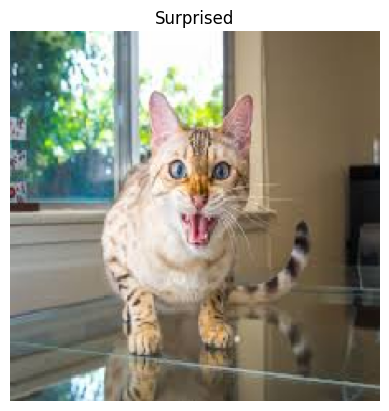

In [13]:
from google.colab import files
uploaded = files.upload()
predict_cat_emotion(list(uploaded.keys())[0])


Saving WhatsApp Image 2026-01-09 at 7.28.47 PM.jpeg to WhatsApp Image 2026-01-09 at 7.28.47 PM.jpeg


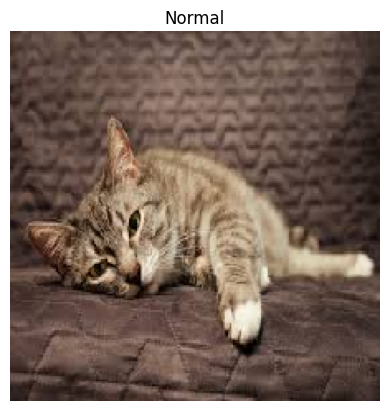

In [14]:
from google.colab import files
uploaded = files.upload()
predict_cat_emotion(list(uploaded.keys())[0])


Saving WhatsApp Image 2026-01-09 at 7.30.23 PM.jpeg to WhatsApp Image 2026-01-09 at 7.30.23 PM.jpeg


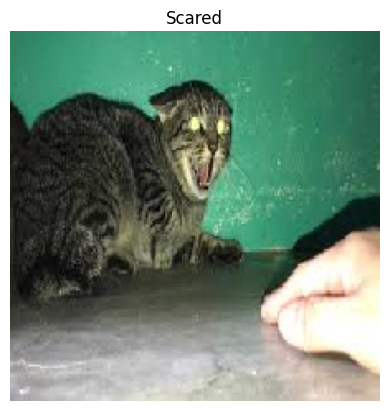

In [15]:
from google.colab import files
uploaded = files.upload()
predict_cat_emotion(list(uploaded.keys())[0])


Saving WhatsApp Image 2026-01-09 at 7.31.06 PM.jpeg to WhatsApp Image 2026-01-09 at 7.31.06 PM.jpeg


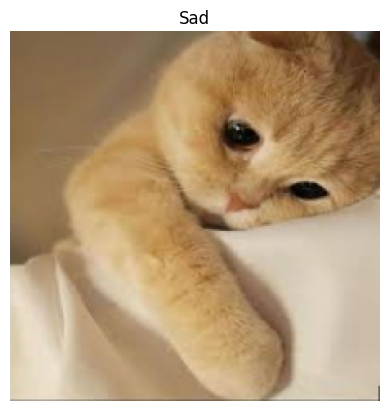

In [17]:
from google.colab import files
uploaded = files.upload()
predict_cat_emotion(list(uploaded.keys())[0])


Saving istockphoto-1350207457-612x612.jpg to istockphoto-1350207457-612x612.jpg


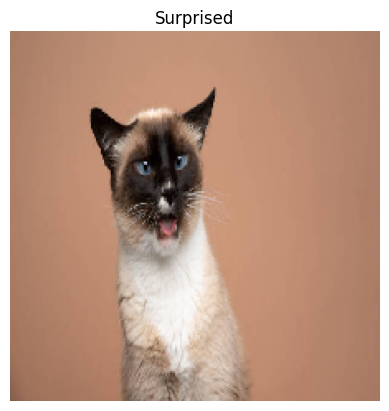

In [19]:
from google.colab import files
uploaded = files.upload()
predict_cat_emotion(list(uploaded.keys())[0])
